In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
X, y = load_data()

In [6]:
print('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [7]:
print('The first element of y is: ', y[0, 0])
print('The last element of y is: ', y[-1, 0])

The first element of y is:  0
The last element of y is:  1


In [10]:
print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


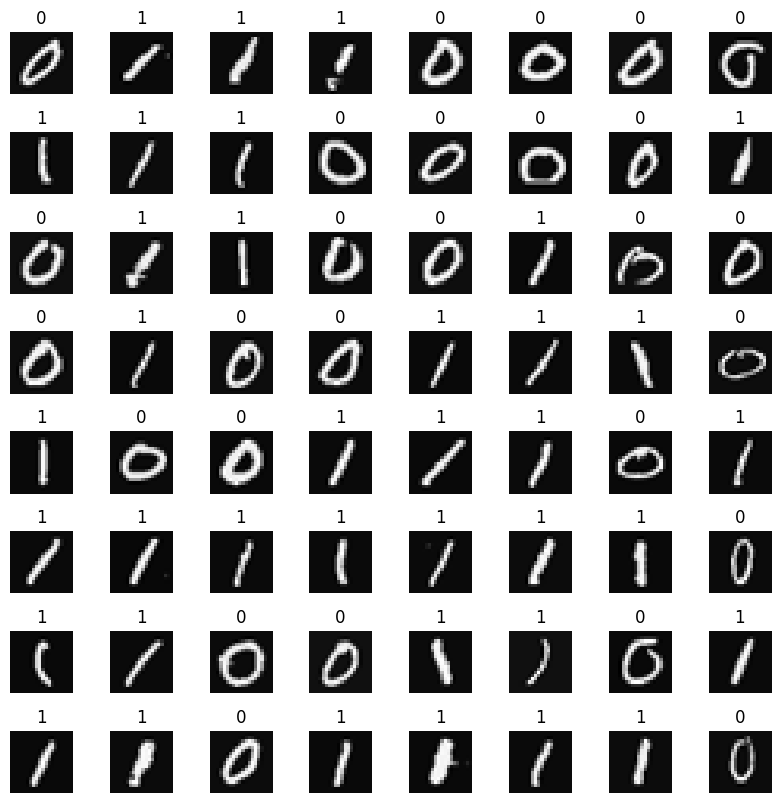

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()

In [18]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1, activation='sigmoid')
    ], name = 'my_model'
)

In [19]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                10025     
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [20]:
[layer1, layer2, layer3] = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [21]:
L1_num_params = 400 * 25 + 25  # W1 + b1
L2_num_params = 25 * 15 + 15   # W2 + b2
L3_num_params = 15 * 1 + 1     # W3 + b3
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [22]:
print(model.layers[2].weights)

[<tf.Variable 'dense_8/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.30528   ],
       [ 0.34229052],
       [ 0.2621621 ],
       [-0.1632539 ],
       [ 0.3833679 ],
       [ 0.46919078],
       [ 0.05558211],
       [-0.36891788],
       [ 0.3990627 ],
       [-0.24765152],
       [ 0.55171865],
       [-0.5546615 ],
       [ 0.12570846],
       [ 0.0026505 ],
       [-0.25239435]], dtype=float32)>, <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy())

model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6091
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4478
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2986
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1994
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1417
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1072
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0852
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0701
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0590
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 13/20
32/32 [==============================

In [25]:
prediction = model.predict(X[0].reshape(1,400))
print(f'predicting a zero: {prediction}')
prediction = model.predict(X[500].reshape(1, 400))
print(f'predicting a one: {prediction}')

1/1 [==============================] - 0s 102ms/step
predicting a zero: [[0.01718955]]
1/1 [==============================] - 0s 23ms/step
predicting a one: [[0.98799294]]


In [26]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f'prediction after threshold: {yhat}')

prediction after threshold: 1


1/1 [==============================] - 0s 22ms/step


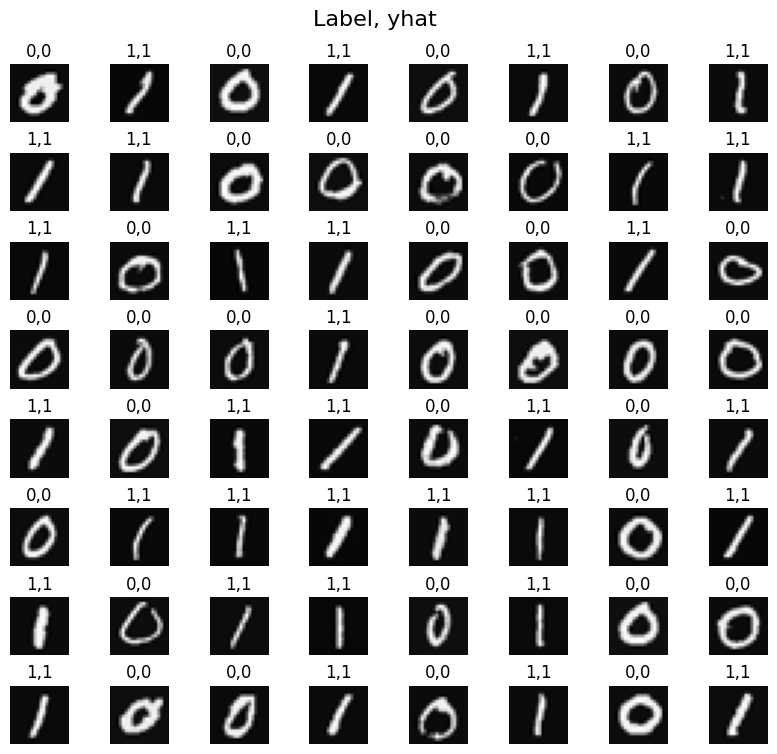

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [28]:
def my_dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)
    
    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
        
    return(a_out)    

In [29]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [30]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

In [31]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [32]:
# prediction
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


1/1 [==============================] - 0s 30ms/step


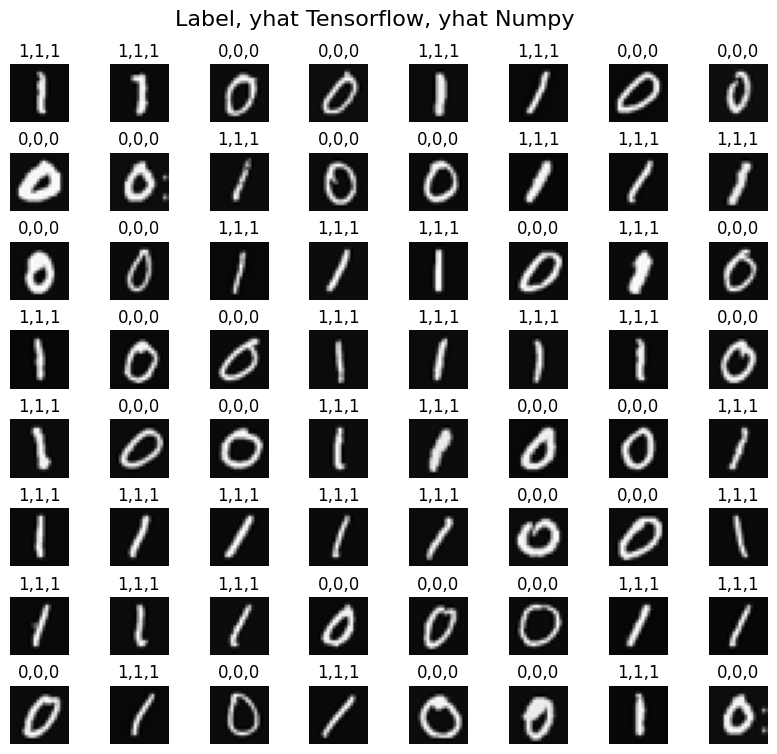

In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

In [34]:
def my_dense_v(A_in, W, b, g):
    z = np.matmul(A_in, W) + b
    A_out = g(z)
    
    return(A_out)

In [35]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [36]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

In [37]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [38]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

(1000, 1)

In [39]:
Yhat = (Prediction >= 0.5).astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


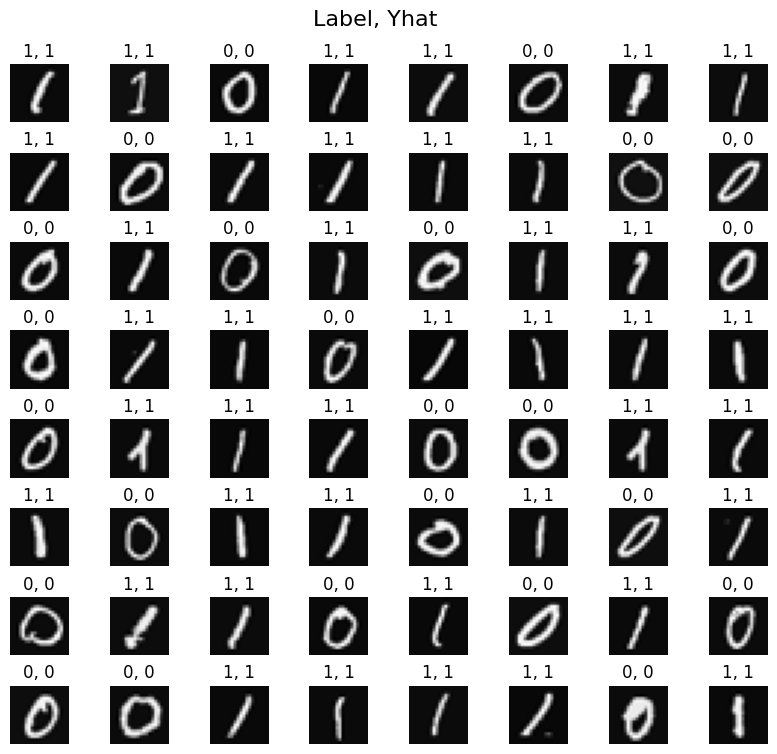

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    ax.imshow(X_random_reshaped, cmap='gray')
   
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

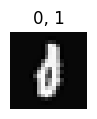

In [42]:
# misclassified
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()